In [1]:
import numpy as np
import cv2
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def load_and_preprocess_images(directory, target_size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                image = image / 255.0  # Normalize
                images.append(image.flatten())
                labels.append(label)

    return np.array(images), np.array(labels)

# Define directories
train_dir = '/Users/draven/Downloads/AutismDataset/consolidated'
valid_dir = '/Users/draven/Downloads/AutismDataset/valid'
# Load and preprocess images
X_train, y_train = load_and_preprocess_images(train_dir)
X_valid, y_valid = load_and_preprocess_images(valid_dir)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

    Autistic       1.00      1.00      1.00        50
Non_Autistic       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
[[50  0]
 [ 0 50]]


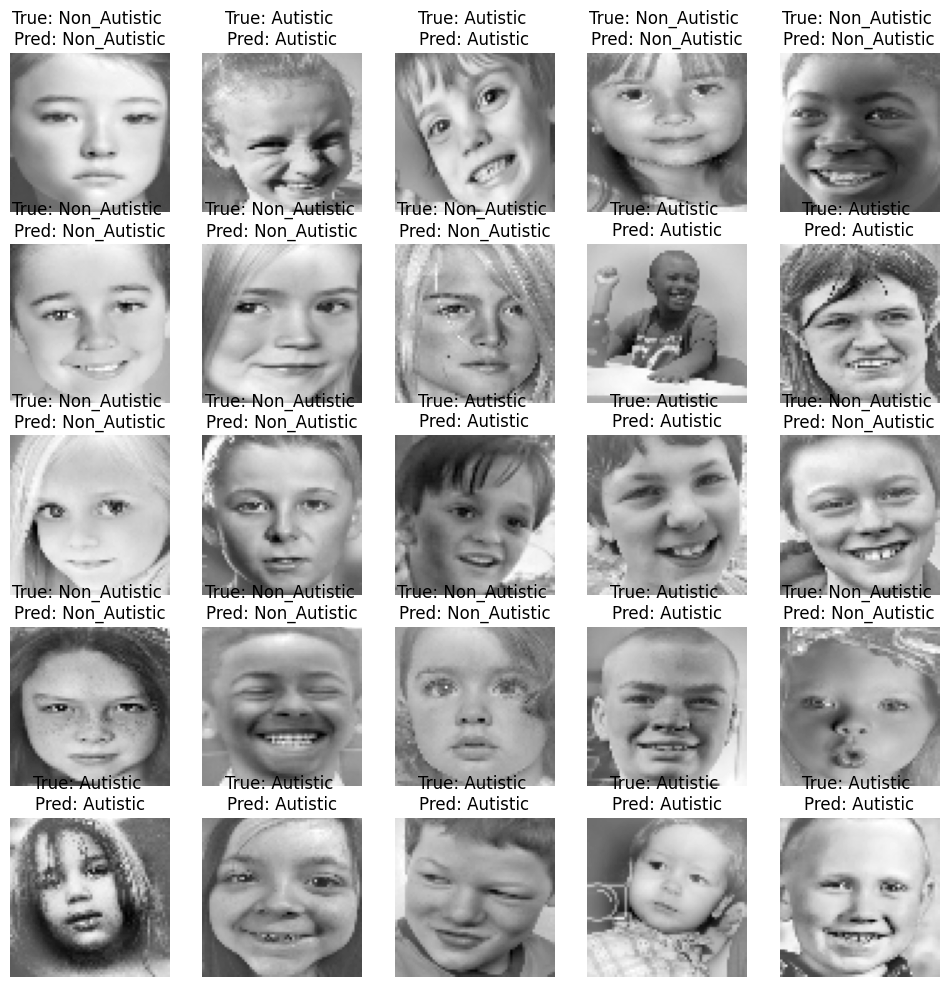

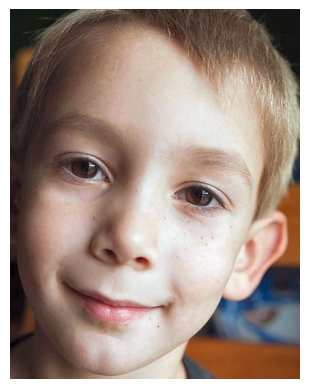

Predicted Class: Autistic
Confidence for class 0: 98.41%
Confidence for class 1: 1.59%


In [3]:
# Function to plot some example predictions
def plot_example_predictions(X, y, y_pred, num_examples=25):
    plt.figure(figsize=(12, 12))
    indices = np.random.choice(len(X), num_examples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[idx].reshape(64, 64), cmap='gray')
        plt.title(f'True: {y[idx]} \nPred: {y_pred[idx]}')
        plt.axis('off')
    plt.show()

# Plot some example predictions
plot_example_predictions(X_valid, y_valid, y_pred)

# Predict on a new image
def predict_image(model, scaler, image_path, target_size=(64, 64)):
    image = cv2.imread(image_path)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if image is not None:
        image = cv2.resize(image, target_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        if len(faces)>0:
            image = image / 255.0  # Normalize
            image = image.flatten().reshape(1, -1)
            image = scaler.transform(image)
            probabilities = model.predict_proba(image)
            prediction = model.predict(image)
            image = Image.open(image_path)
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            print(f'Predicted Class: {prediction[0]}')
            print(f'Confidence for class 0: {probabilities[0][0] * 100:.2f}%')
            print(f'Confidence for class 1: {probabilities[0][1] * 100:.2f}%')
        else:
            #Here you need to code for retaking the image
            return None #exclude this line 
# Example usage
predict_image(model, scaler, '/Users/draven/Downloads/AutismDataset/test/Autistic.45.jpg')

